In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from xgboost import plot_importance

from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils import class_weight
from sklearn.linear_model import LogisticRegression

from torch import nn
import neural_network
import losses
import torch

ModuleNotFoundError: ignored

EDA initially looking at raw data

In [10]:
df = pd.read_csv("application_data.csv", index_col=0)
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


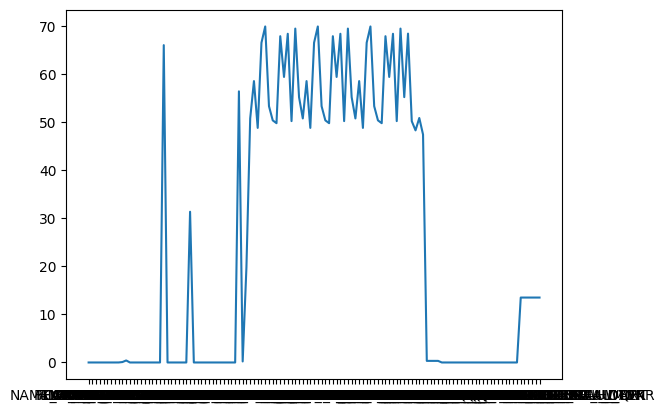

In [19]:
# Check percentage of nulls in each column
null_percentages = df.isnull().mean() * 100
null_percentages

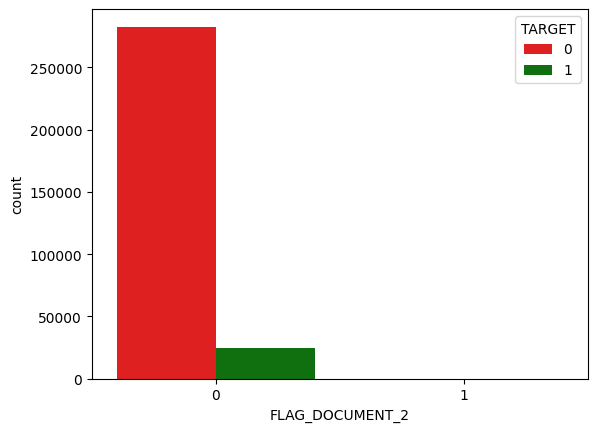

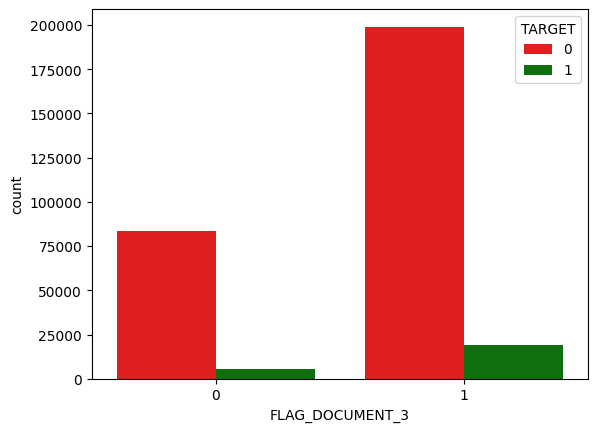

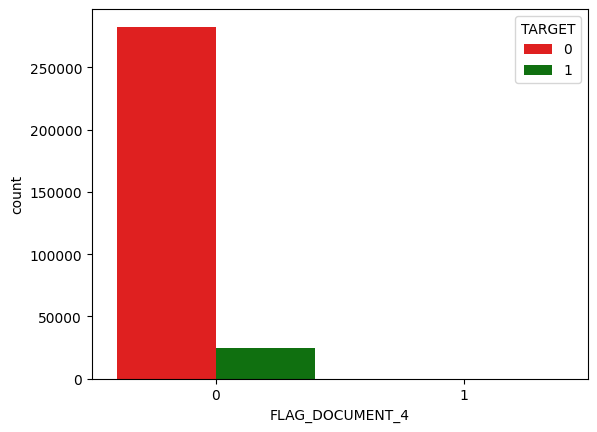

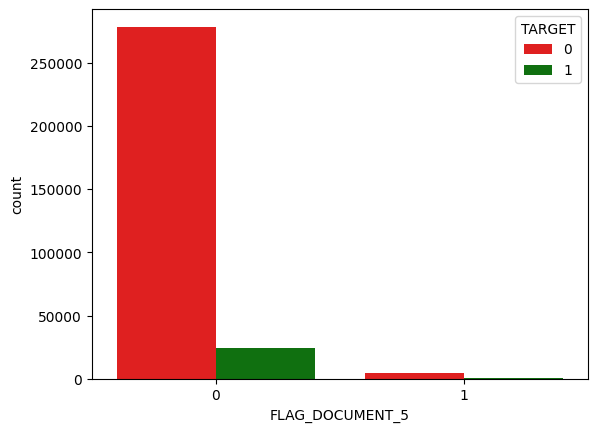

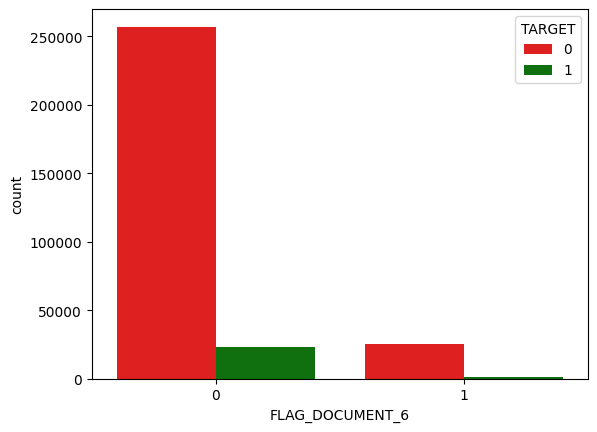

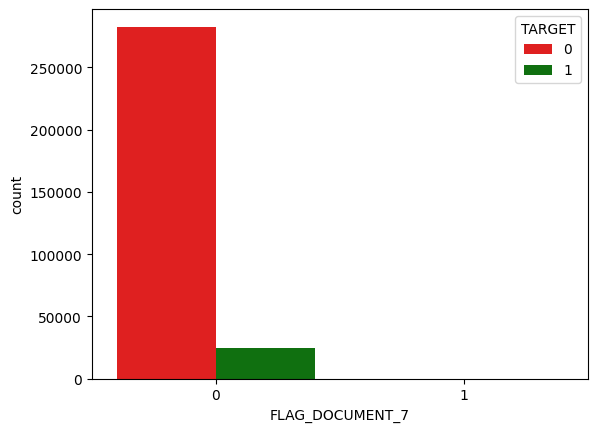

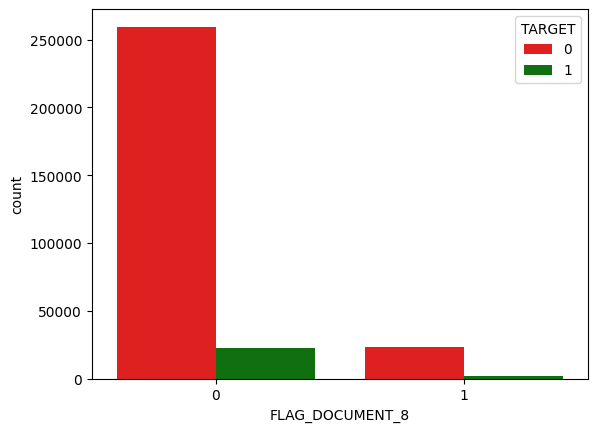

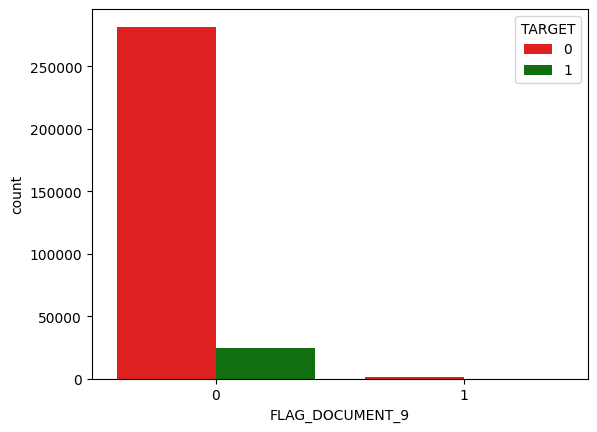

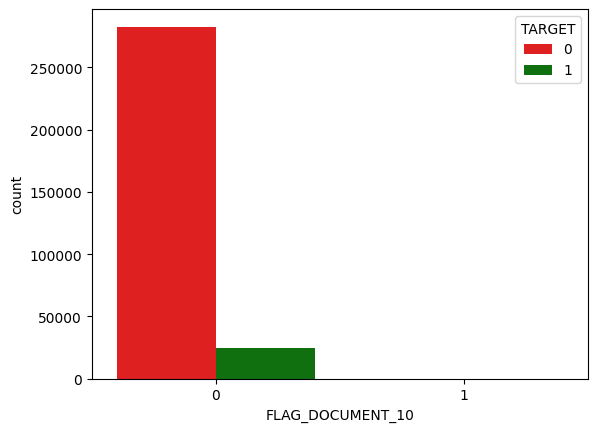

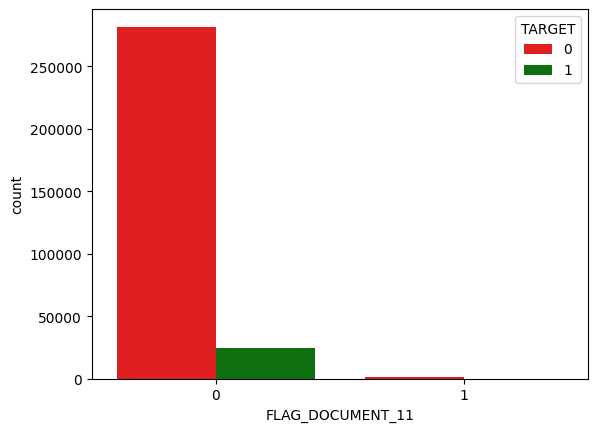

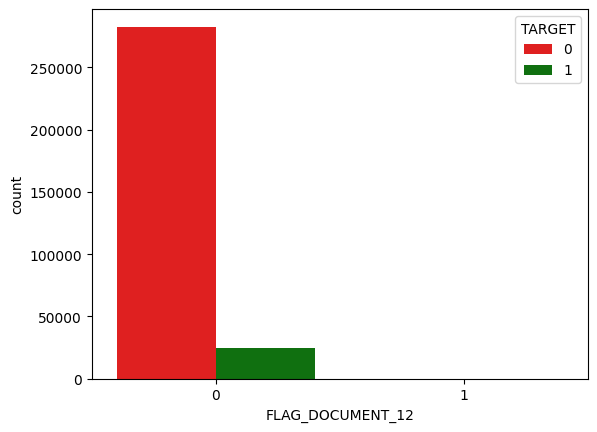

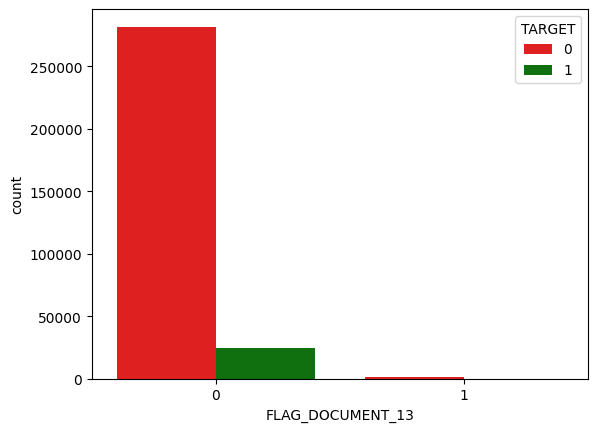

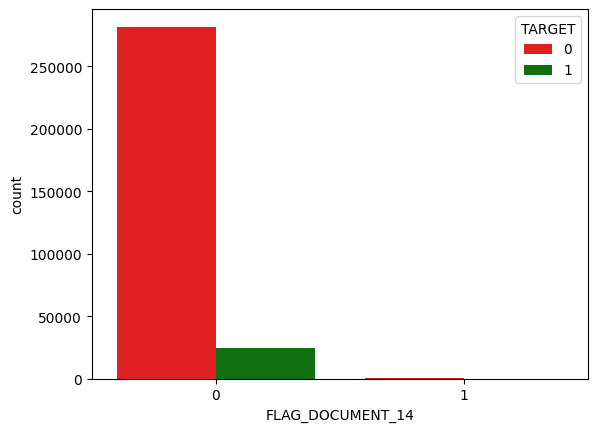

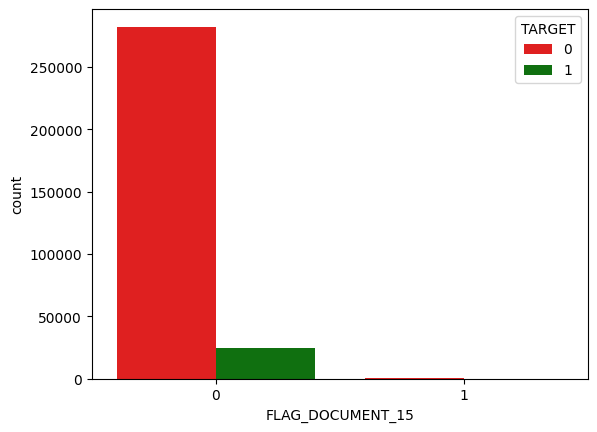

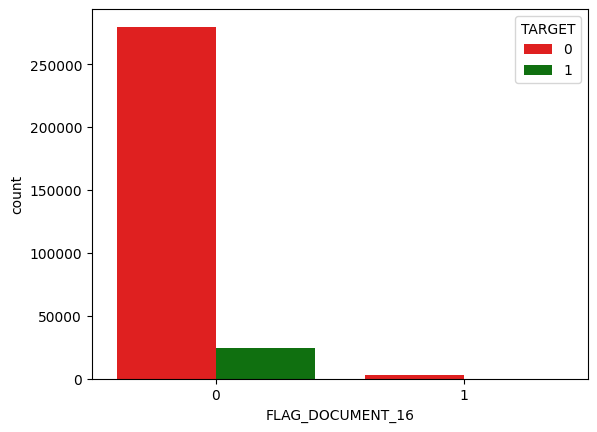

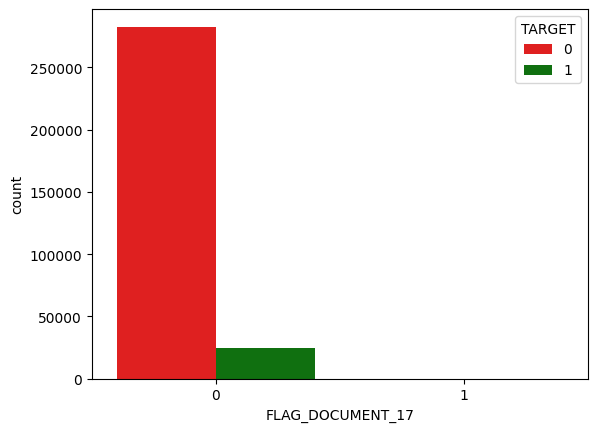

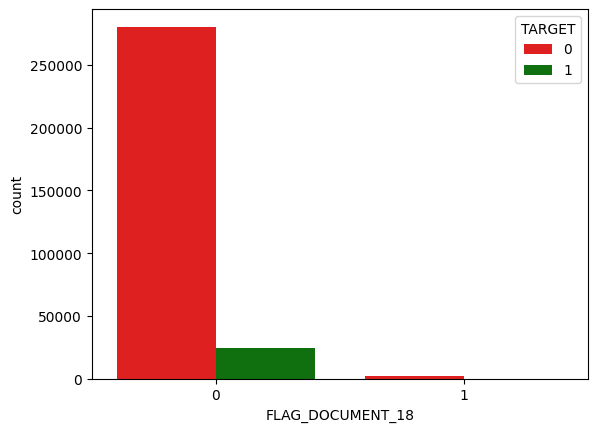

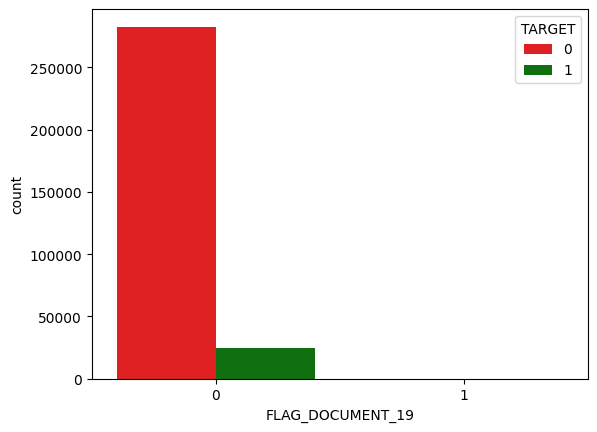

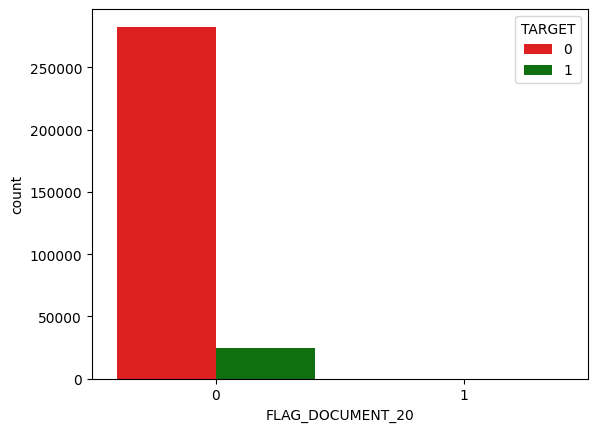

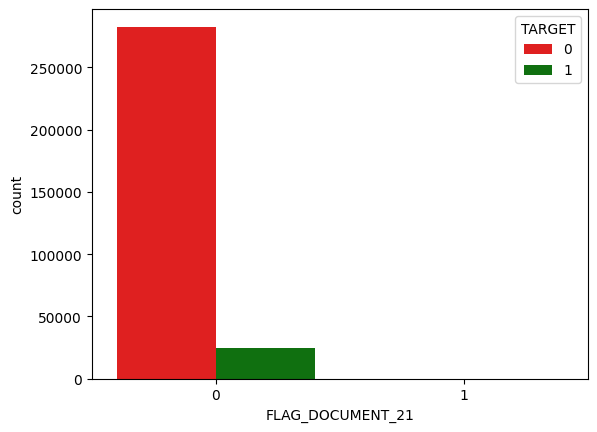

In [13]:
# Check if flag document columns will be useful

flag_doc_cols = [f'FLAG_DOCUMENT_{i}' for i in range(2, 22)]
flag_doc_df = df[flag_doc_cols + ['TARGET']]

for col in flag_doc_cols:
    plt.figure()
    sns.countplot(data=flag_doc_df, x=col, hue='TARGET', palette=['r', 'g'])
  

<Axes: >

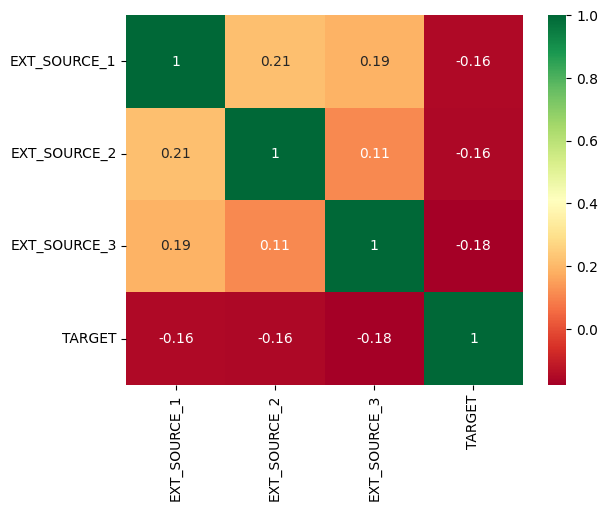

In [21]:
ext_source_df = df[["EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","TARGET"]]
ext_source_corr = ext_source_df.corr()

sns.heatmap(data=ext_source_corr, annot=True, cmap="RdYlGn")

EDA on cleaned data

In [ ]:
df = pd.read_csv("clean2_data-ext-norm.csv", index_col=0)

(array([244404.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  20490.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

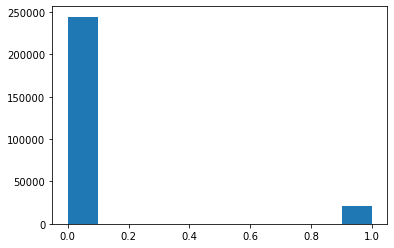

In [ ]:
plt.hist(df["TARGET"])

[Text(0.5, 1.0, 'Distribution of Class Labels')]

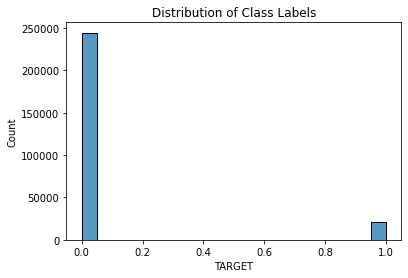

In [ ]:
sns.histplot(data=df, x="TARGET").set(title='Distribution of Class Labels')

In [ ]:
seed = 100
test_size = 0.15
X = df.drop(columns=["TARGET", "SK_ID_CURR"], axis=1)
y = df["TARGET"]

# note: stratify=df.buy generates
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=test_size, random_state=seed, stratify=y)
classes_weights = class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train
)

[Text(0.5, 1.0, 'Distribution of Training Class Labels')]

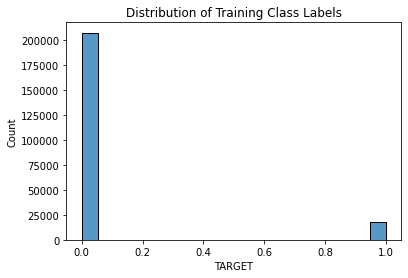

In [ ]:
sns.histplot(data=y_train).set(title='Distribution of Training Class Labels')

[Text(0.5, 1.0, 'Distribution of Testing Class Labels')]

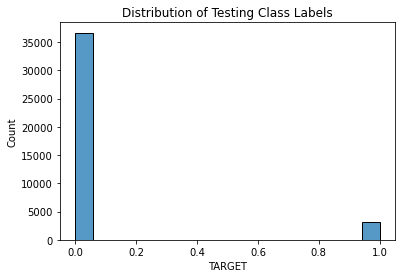

In [ ]:
sns.histplot(data=y_test).set(title='Distribution of Testing Class Labels')